In [168]:
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
import pylab
import os

%matplotlib inline

In [169]:
print(os.getcwd())
start = os.getcwd()
#print(os.listdir())


df = pd.read_csv("./Burns_006157786.csv", encoding='latin-1')
#df = pd.read_csv("Burns_006157786/dataset.csv", encoding='latin-1')
df = df.loc[df['state'].isin(["Wisconsin","Illinois","Iowa"])]


#df.isnull().any()
print(df.describe())
df =df.drop(['BLOCKID'], axis=1) #Almost no records actually had values in this column, wont be using this data anyways
null_data = df[df.isnull().any(axis=1)]
print(null_data)
df = df.dropna()
df['Ratio']= df['male_pop'] / (df['male_pop'] + df['female_pop'])
print(df.describe())
#Only dropped 34 out of 2740 records, so not a super substantial loss of data. Also because these were missing houshold income
#data they werent of much use other than looking at distributions of other characteristics 
#"C:\Users\pburn\OneDrive\Documents\Burns_006157786\HiData.csv"





C:\Users\pburn
                 UID  BLOCKID  SUMLEVEL     COUNTYID      STATEID  \
count    2740.000000      0.0    2740.0  2740.000000  2740.000000   
mean   256516.581387      NaN     140.0    82.369343    27.454745   
std     22069.412277      NaN       0.0    56.233684    16.648563   
min    240995.000000      NaN     140.0     1.000000    17.000000   
25%    242640.750000      NaN     140.0    31.000000    17.000000   
50%    243967.000000      NaN     140.0    79.000000    17.000000   
75%    292393.250000      NaN     140.0   123.000000    55.000000   
max    293718.000000      NaN     140.0   203.000000    55.000000   

           zip_code    area_code          lat          lng         ALand  ...  \
count   2740.000000  2740.000000  2740.000000  2740.000000  2.740000e+03  ...   
mean   57576.760219   619.927007    42.024657   -89.253978  7.843303e+07  ...   
std     4137.145817   205.841020     1.490891     2.005699  1.646028e+08  ...   
min    50003.000000   217.000000    36.

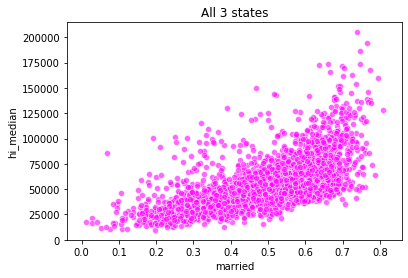

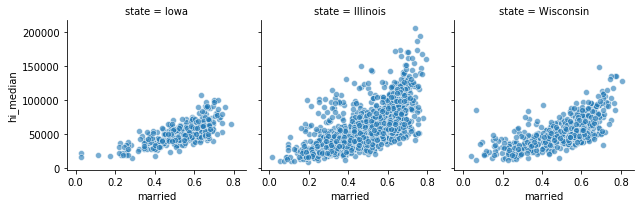

In [170]:
sns.scatterplot(df['married'],df['hi_median'] ,  color='magenta', alpha =.6)
plt.title("All 3 states")

g = sns.FacetGrid(df, col = "state")
g.map(sns.scatterplot, "married", "hi_median", alpha = .6);



Illinois
Intercept: [-1643.32151146]
Slope: [[123959.79538389]]
_______________________________________________________________________


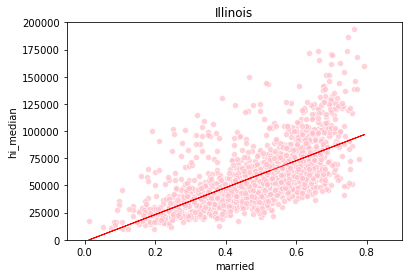

_______________________________________________________________________
BP Test Results: (310.7284442535215, nan, 387.09407925109537, 3.317000281247001e-77)
Shapiro Test Results: (0.9728147983551025, 1.1851478533701277e-16) 


Wisconsin
Intercept: [4167.54828904]
Slope: [[96929.71251465]]
_______________________________________________________________________


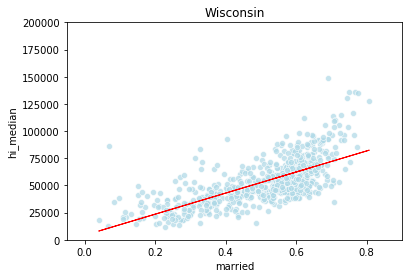

_______________________________________________________________________
BP Test Results: (134.7400229860474, nan, 165.47746793850342, 3.094259941060361e-34)
Shapiro Test Results: (0.930757462978363, 9.566213916819594e-18) 


Iowa
Intercept: [5676.66006947]
Slope: [[85079.27628611]]
_______________________________________________________________________


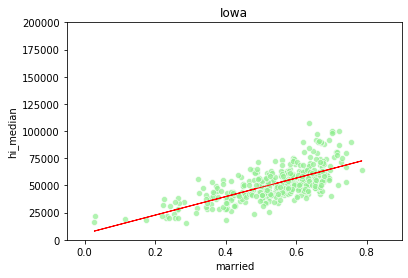

_______________________________________________________________________
BP Test Results: (111.65036847674169, nan, 152.51085952571165, 4.8990578557579596e-30)
Shapiro Test Results: (0.9231973886489868, 1.0247484555792746e-13) 




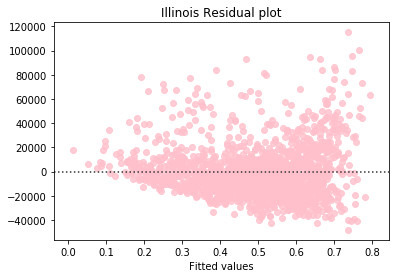

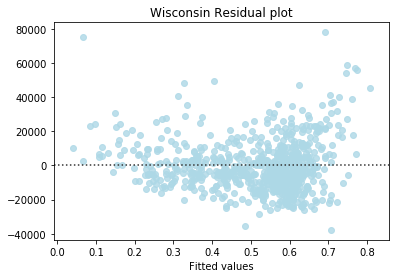

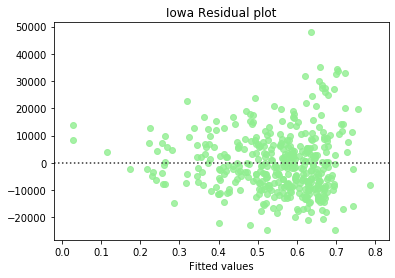

In [171]:
state = ['Illinois','Wisconsin','Iowa']
color = ['gray','blue','green']
col = ['pink','lightblue','lightgreen']

i=0
while(i<3):
    print(state[i])
    tempdf = df.loc[df['state'].isin([state[i]])]
    regressor = LinearRegression()  
    xdata = tempdf['married'].values.reshape(-1,1)
    ydata = tempdf['hi_median'].values.reshape(-1,1)
    regressor.fit(xdata,ydata)
    
    print('Intercept:',regressor.intercept_)
    print('Slope:',regressor.coef_)
    y_pred = regressor.predict(xdata)
    
    #plt.scatter(xdata, ydata,  color=col)
    sns.scatterplot(tempdf['married'], tempdf['hi_median'],color=col[i],alpha=.7)
    plt.title(state[i])
    axes = plt.gca()

    axes.set_ylim([0,200000])
    axes.set_xlim([-.05,.9])
    plt.plot(xdata, y_pred, color='red', linewidth=1)
    print('_______________________________________________________________________')
    plt.show()
    print('_______________________________________________________________________')
    sm.stats.diagnostic.het_breuschpagan(xdata,exog_het = ydata)
    res = ydata - y_pred
    bp_test = het_breuschpagan(res,xdata)
    print("BP Test Results:", bp_test)
    print('Shapiro Test Results:',stats.shapiro(xdata),"\n\n")
    i= i+1
    

i=0
while(i<3):
    plt.figure()
    tempdf = df.loc[df['state'].isin([state[i]])]
    xdata = tempdf['married'].values.reshape(-1,1)
    ydata = tempdf['hi_median'].values.reshape(-1,1)
    sns.residplot(x=xdata,y=ydata, data=tempdf, color =col[i])
    plt.xlabel("Fitted values")
    plt.title(state[i] +' Residual plot')
    i= i+1


IL: 59520.728198599616
IA: 52352.108695652176
WI: 53793.133148404995


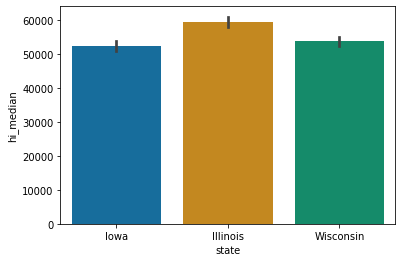

In [172]:
bar = sns.barplot(data =df, x= "state", y = "hi_median", palette = "colorblind")
#print('All:',df['hi_median'].mean())
x= (df.loc[df['state']==('Illinois')])
print('IL:',(df.loc[df['state']==('Illinois')])['hi_median'].mean())
print('IA:',(df.loc[df['state']==('Iowa')])['hi_median'].mean())
print('WI:',(df.loc[df['state']==('Wisconsin')])['hi_median'].mean())

In [173]:
regressor = LinearRegression()  
xdata = df['married'].values.reshape(-1,1)
ydata = df['hi_median'].values.reshape(-1,1)
regressor.fit(xdata,ydata)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept: [2452.0670331]
Slope: [[107429.13127597]]


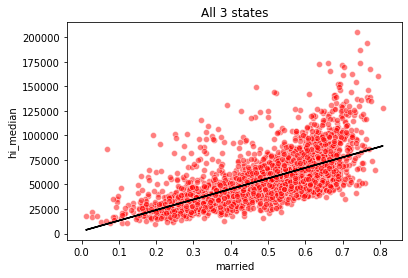

In [174]:
y_pred = regressor.predict(xdata)
sns.scatterplot(df['married'], df['hi_median'],color='red',alpha=.5)
#plt.scatter(xdata, ydata,  color='lightgreen')
plt.plot(xdata, y_pred, color='black', linewidth=1.5)
plt.title("All 3 states")
print('Intercept:',regressor.intercept_)
print('Slope:',regressor.coef_)
plt.show()


Text(0.5, 1.0, 'Residual plot all 3 states')

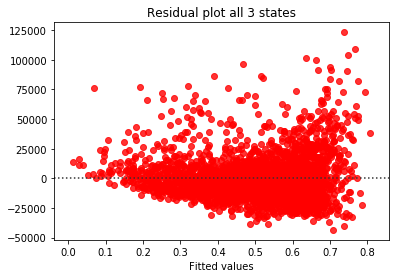

In [175]:
sns.residplot(x=xdata,y=ydata, data=df, color ='red')
plt.xlabel("Fitted values")
plt.title('Residual plot all 3 states')



In [176]:
sm.stats.diagnostic.het_breuschpagan(xdata,exog_het = ydata)
res = ydata - y_pred
bp_test = het_breuschpagan(res,xdata)
print(bp_test)
#Because the P-value is less than .05, this indicates heteroscedasticity 


(426.26400178589535, nan, 505.77967174011206, 7.97648136899351e-103)


In [177]:
stats.shapiro(xdata)
#not a normal data set but it doesn't have to be

(0.9578243494033813, 2.4944028342121275e-27)

Text(0.5, 1.0, 'qq plot')

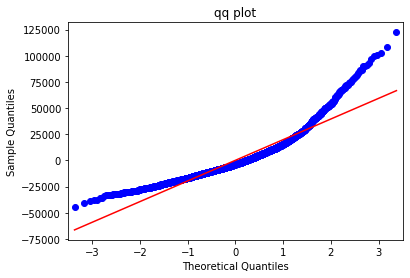

In [178]:
#qq = sm.qqplot(res, stats.t, fit=True, line='45')
#sm.qqplot(res, loc = 20, scale = 5 ,  line='45', color='green')
mod_fit = sm.OLS(ydata, xdata).fit()
res = mod_fit.resid # residuals

fig = sm.qqplot(res,line='s')
plt.title("qq plot")




In [179]:
#The qqplot suggests that the data is skewed to the right. This is expected as we know there are areas
# with extremely wealthy people concentrated in rich neighborhoods

In [180]:
bp_test = het_breuschpagan(res,xdata)
print("BP Test Results:", bp_test)
print('Shapiro Test Results:',stats.shapiro(xdata),"\n\n")

BP Test Results: (425.2139449895004, nan, 504.3014528564818, 1.4887904520619672e-102)
Shapiro Test Results: (0.9578243494033813, 2.4944028342121275e-27) 




In [181]:
#Significance test

#IL
tempdf = df.loc[df['state'].isin(['Illinois'])]
xdata = tempdf['married'].values.reshape(-1,1)
xdata = sm.add_constant(xdata)
ydata = tempdf['hi_median'].values.reshape(-1,1)
mod_fitIL = sm.OLS(ydata, xdata).fit()
y_predIL = mod_fitIL.predict(xdata)
resIL = mod_fitIL.resid # residuals

#IO
tempdf = df.loc[df['state'].isin(['Iowa'])]
xdata = tempdf['married'].values.reshape(-1,1)
xdata = sm.add_constant(xdata)
ydata = tempdf['hi_median'].values.reshape(-1,1)
mod_fitIO = sm.OLS(ydata, xdata).fit()
y_predIO = mod_fitIO.predict(xdata)
resIO = mod_fitIO.resid # residuals

#WI
tempdf = df.loc[df['state'].isin(['Wisconsin'])]
xdata = tempdf['married'].values.reshape(-1,1)
xdata = sm.add_constant(xdata)
ydata = tempdf['hi_median'].values.reshape(-1,1)
mod_fitWI = sm.OLS(ydata, xdata).fit()
y_predWI = mod_fitWI.predict(xdata)
resWI = mod_fitWI.resid # residuals

#notIL (complement)
tempdf = df.loc[df['state'].isin(['Wisconsin', 'Iowa'])]
xdata = tempdf['married'].values.reshape(-1,1)
xdata = sm.add_constant(xdata)
ydata = tempdf['hi_median'].values.reshape(-1,1)
mod_fitC = sm.OLS(ydata, xdata).fit()
y_predC = mod_fitC.predict(xdata)
resC = mod_fitC.resid # residuals

#print(stats.kruskal(y_predIL,y_predIO,y_predWI))
#stats.kruskal(resIL,resIO,resWI)
#kruskal test not actually appropriate, not useful

print(mod_fitIL.summary(),mod_fitIO.summary(),mod_fitWI.summary(),"comp",mod_fitC.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          1.74e-177
Time:                        20:57:23   Log-Likelihood:                -17935.
No. Observations:                1571   AIC:                         3.587e+04
Df Residuals:                    1569   BIC:                         3.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1643.3215   1962.709     -0.837      0.4

In [182]:
print('IL',mod_fitIL.params)
print('IA',mod_fitIO.params)
print('WI',mod_fitWI.params)

print('Complement',mod_fitC.params)


IL [ -1643.32151146 123959.79538389]
IA [ 5676.66006947 85079.27628611]
WI [ 4167.54828904 96929.71251465]
Complement [ 5348.35220797 91215.80092536]


In [183]:
ttest_ind_from_stats(mean1=123959.8, std1=3815.72, nobs1=1571, mean2=91215.8, std2=2989.49, nobs2=1135)

Ttest_indResult(statistic=240.6267114859777, pvalue=0.0)